In [58]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [59]:
df=pd.read_csv('Fraud Loan Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [60]:
#checking the datatype of each column 
print(df.dtypes)
# CoapplicantIncome,loan amount,loan amount term , credit history are float data type
# Application income is in integer data type and rest are object data type
print(df.info())

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         

In [61]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
#checking the shape of data set
df.shape

(614, 13)

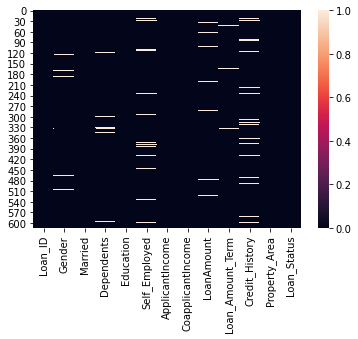

In [63]:
#checking null values using heat map
sns.heatmap(df.isnull())
#we can see that their is null values present in Gender,Dependents,Self employed,Loan amount 
#loan amount term and credit histry

In [64]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
# filling the missing values for numerical terms - mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [66]:
# Filling the missing values for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

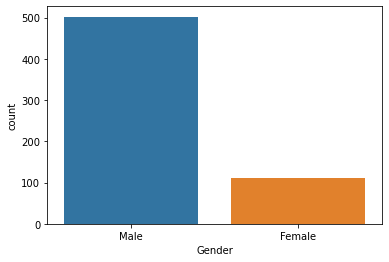

In [68]:
sns.countplot(df['Gender'])

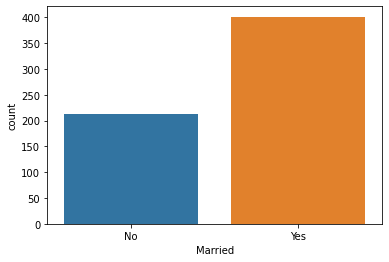

In [69]:
sns.countplot(df['Married'])

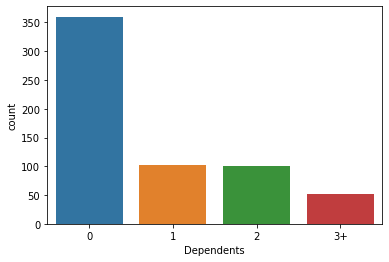

In [70]:
sns.countplot(df['Dependents'])

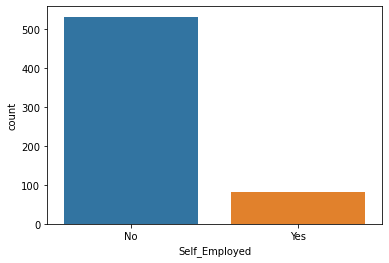

In [71]:
sns.countplot(df['Self_Employed'])

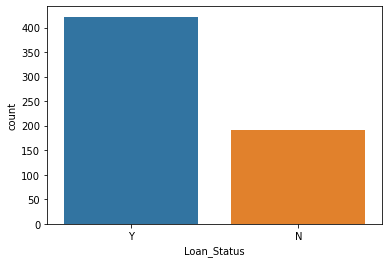

In [72]:
sns.countplot(df['Loan_Status'])

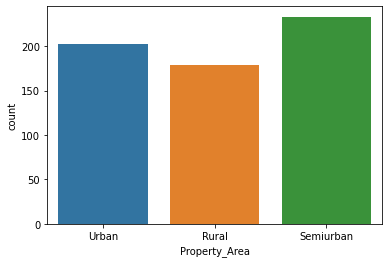

In [73]:
sns.countplot(df['Property_Area']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x140f4ac7ca0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x140f4ac7af0>,
 'cmins': <matplotlib.collections.LineCollection at 0x140f4ad4130>,
 'cbars': <matplotlib.collections.LineCollection at 0x140f4ad4400>}

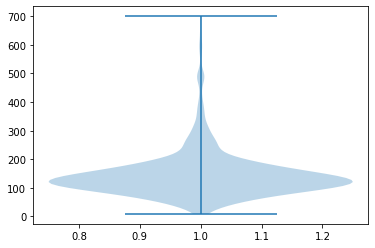

In [74]:
plt.violinplot(df["LoanAmount"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x140f4b2d250>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x140f4b2d0d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x140f4b2d130>,
 'cbars': <matplotlib.collections.LineCollection at 0x140f4b2d6a0>}

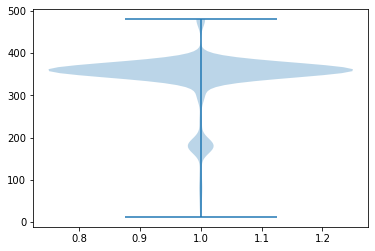

In [75]:
plt.violinplot(df["Loan_Amount_Term"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x140f4bd82e0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x140f4b84ac0>,
 'cmins': <matplotlib.collections.LineCollection at 0x140f4bd8760>,
 'cbars': <matplotlib.collections.LineCollection at 0x140f4bd8a30>}

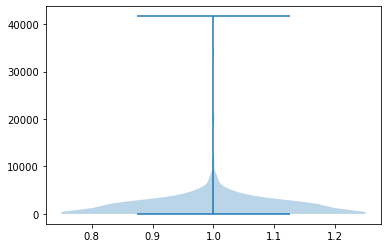

In [78]:
plt.violinplot(df["CoapplicantIncome"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x140f4b75a60>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x140f4b758e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x140f4b75940>,
 'cbars': <matplotlib.collections.LineCollection at 0x140f4b841f0>}

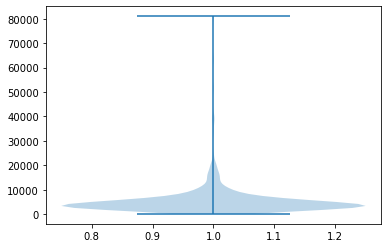

In [77]:
plt.violinplot(df["ApplicantIncome"])

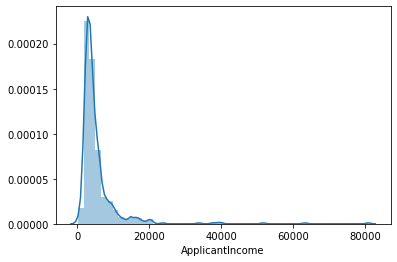

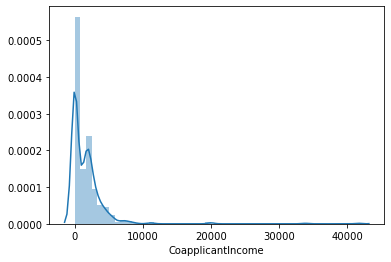

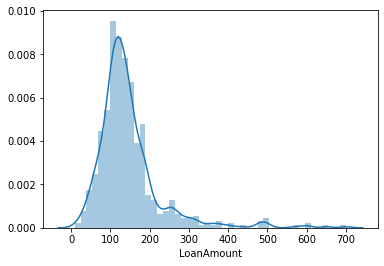

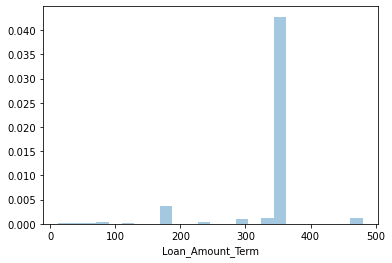

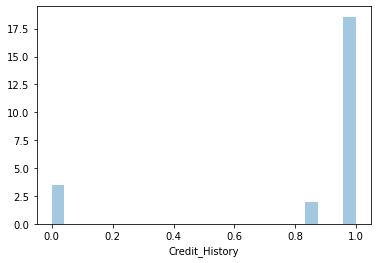

In [17]:
# checking wheather data is normally distributed or not
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()
    


# From the above visualization we can say that
-> Majority of the applicant income lies between 0 to 20000 and only few applicant have more than 20000 income

-> Majority of the coapplicant income lies between 0 to 7000 and only few coapplicant have more than 7000 income

->Majority of loan amount lies between 0 to 200

ApplicantIncome         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
CoapplicantIncome    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
LoanAmount           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Loan_Amount_Term     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Credit_History       AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
dtype: object

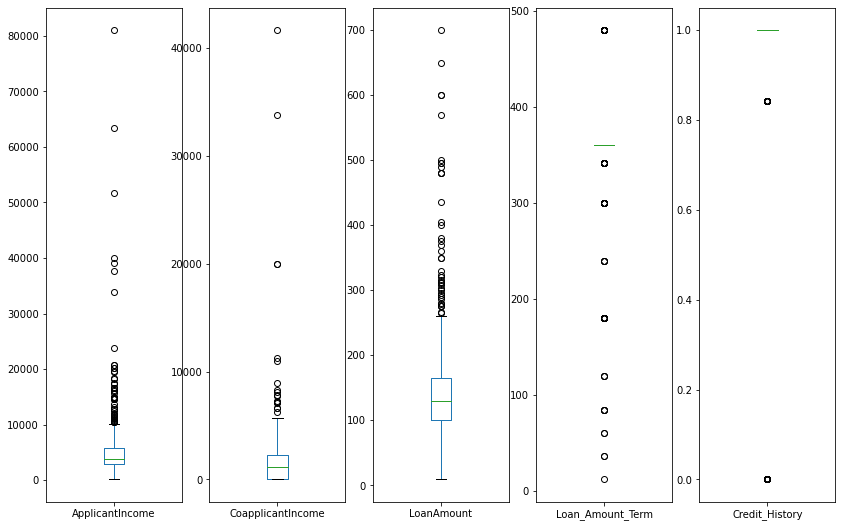

In [18]:
# from below observation we can say that many outliers are present in ApplicantIncome, CoaaplicantIncome, LoanAmount

df.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000140F050C6D0>,
      dtype=object)

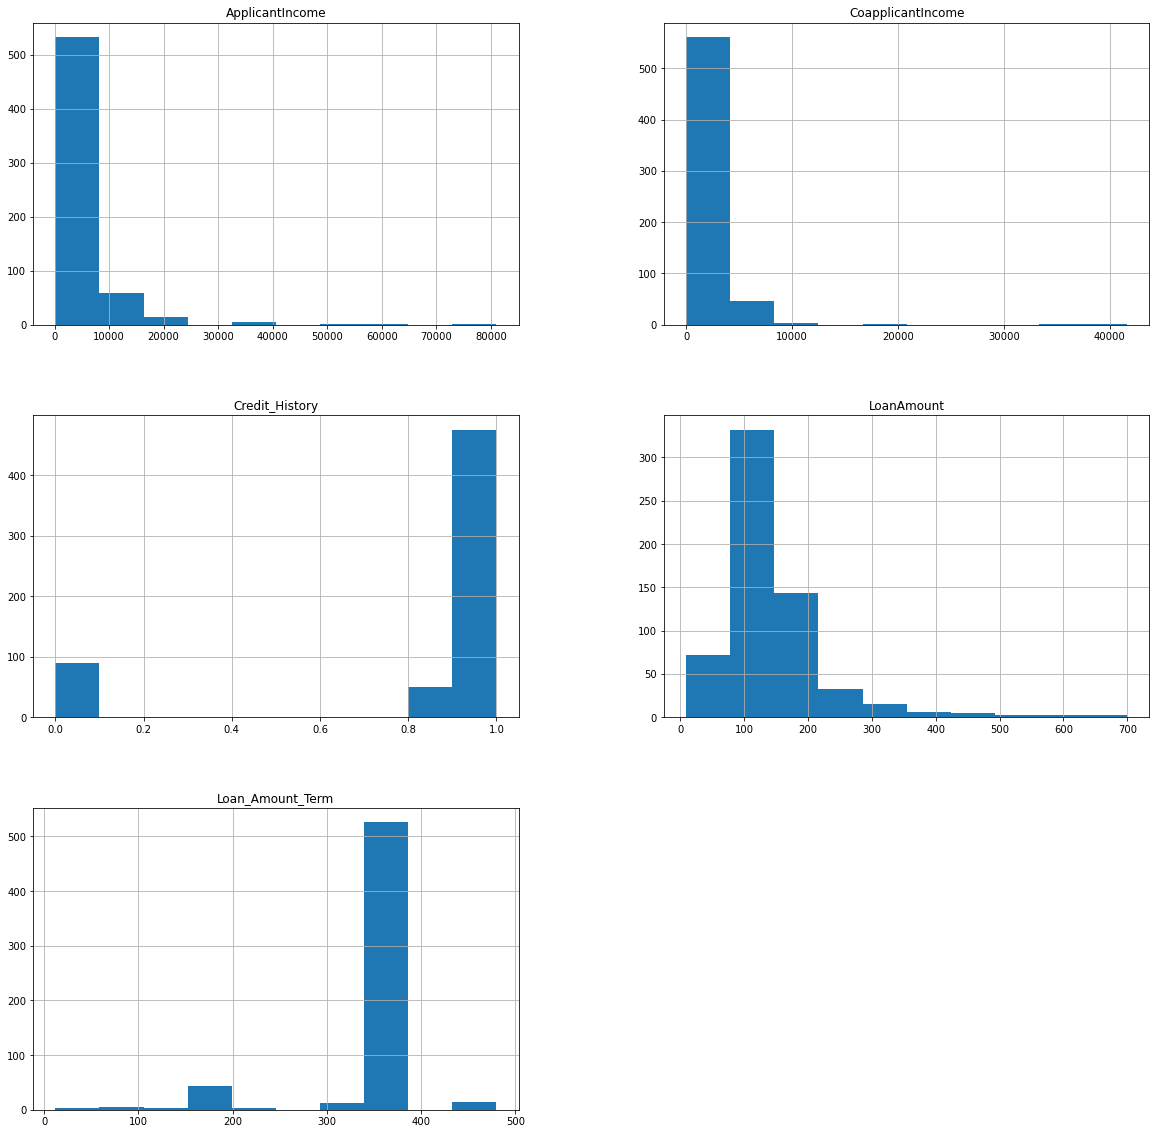

In [19]:
df.hist(figsize=(20,20))

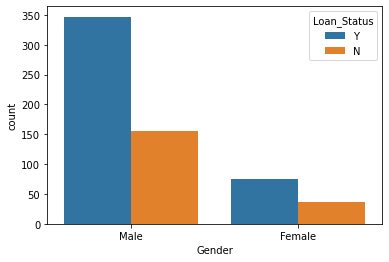

In [20]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

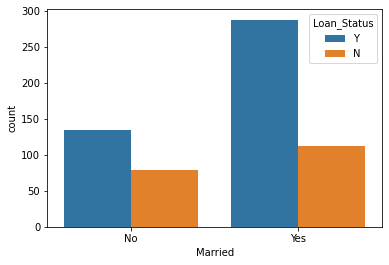

In [21]:
sns.countplot(x="Married",hue="Loan_Status",data=df)

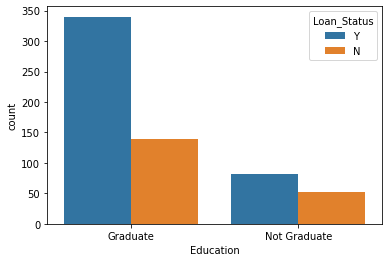

In [22]:
sns.countplot(x="Education",hue="Loan_Status",data=df)

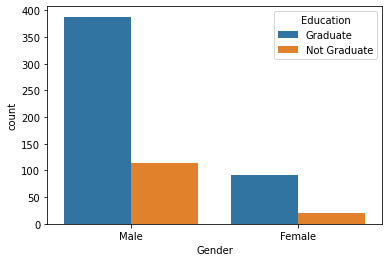

In [23]:
sns.countplot(x="Gender",hue="Education",data=df)

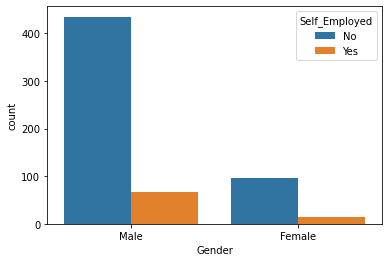

In [24]:
sns.countplot(x="Gender",hue="Self_Employed",data=df)

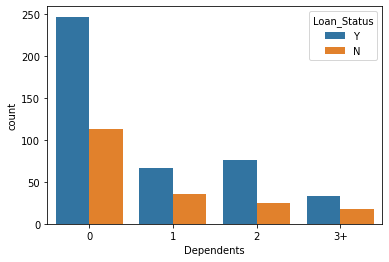

In [25]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df)

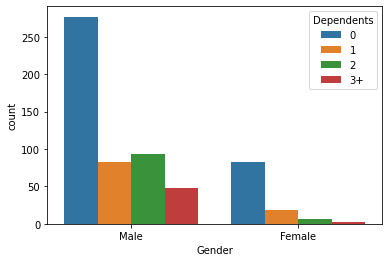

In [26]:
sns.countplot(x="Gender",hue="Dependents",data=df)

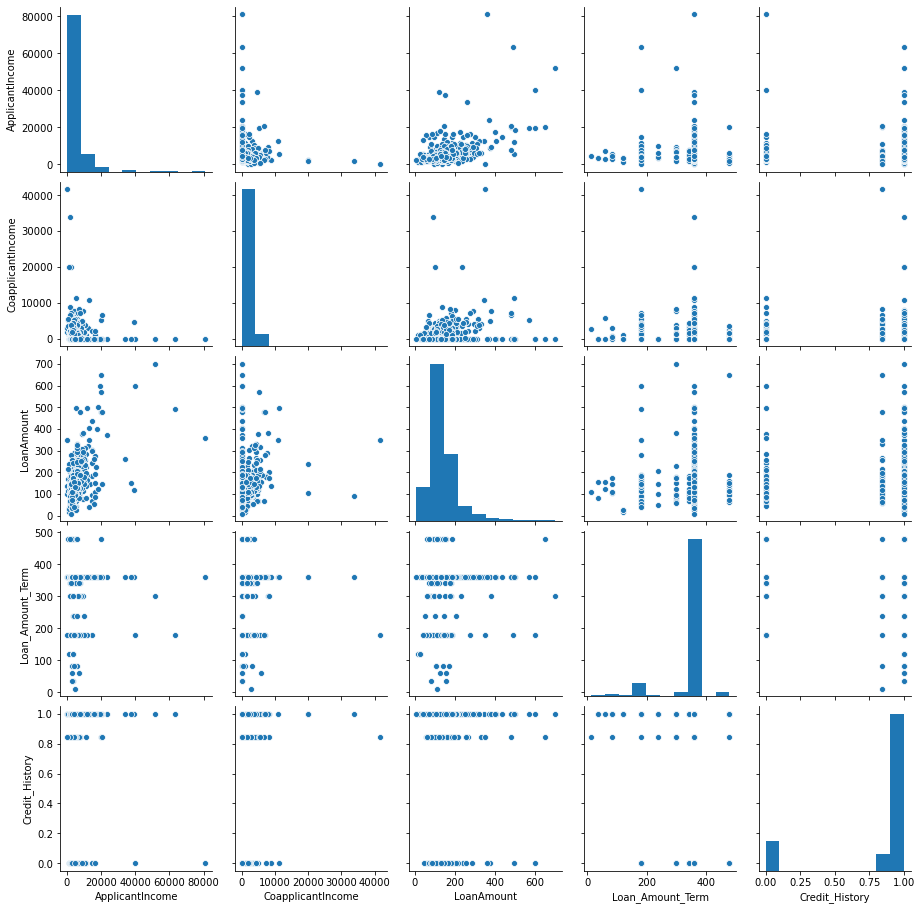

In [27]:
sns.pairplot(df)

# Creating a New Attribute

In [28]:
df['Total income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Transforming Data set into numerical category by using LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))


# Dropping unnecessary columns

In [30]:
df.drop(columns=["ApplicantIncome"],inplace=True)
df.drop(columns=["CoapplicantIncome"],inplace=True)


In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0,1,2900.0
610,610,1,1,3,0,0,40.000000,180.0,1.0,0,1,4106.0
611,611,1,1,1,0,0,253.000000,360.0,1.0,2,1,8312.0
612,612,1,1,2,0,0,187.000000,360.0,1.0,2,1,7583.0


# Statistical Analysis

In [32]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.000000,0.842199,1.037459,0.687296,7024.705081
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.372489,0.349681,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


<function matplotlib.pyplot.show(*args, **kw)>

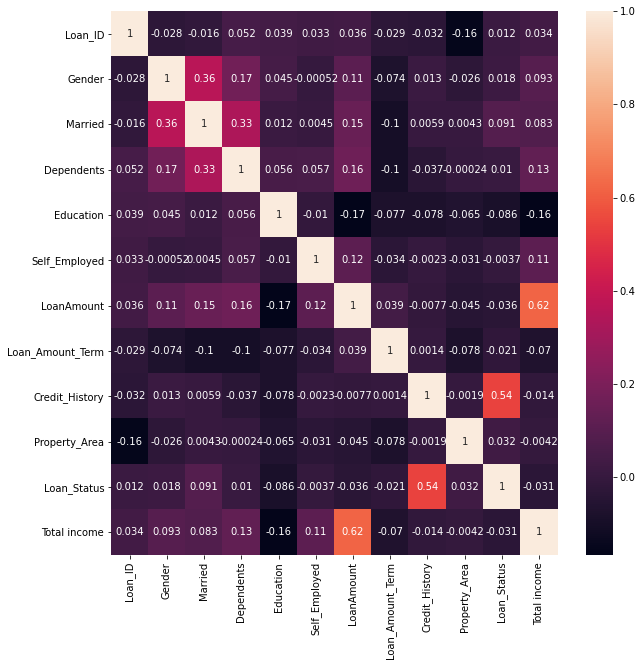

In [33]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show

-> From the above observation we can see that loan status is positively related with credit history, property area, married and dependents


-> And negatively related with Education, self employed, loan amount, loan amount term and total income

In [34]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total income
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.035684,-0.028945,-0.032429,-0.155416,0.011773,0.033774
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.107930,-0.073567,0.012819,-0.025752,0.017987,0.093191
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.147141,-0.100863,0.005852,0.004257,0.091478,0.083319
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.163106,-0.101054,-0.037392,-0.000244,0.010118,0.125590
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884,-0.161362
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.115260,-0.033943,-0.002260,-0.030860,-0.003700,0.113000
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,1.000000,0.038801,-0.007738,-0.044776,-0.036416,0.620102
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,0.038801,1.000000,0.001395,-0.077620,-0.020974,-0.069830
Credit_History,-0.032429,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.007738,0.001395,1.000000,-0.001880,0.540483,-0.014447
Property_Area,-0.155416,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.044776,-0.077620,-0.001880,1.000000,0.032112,-0.004218


# Removing Outliers

In [35]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("new shape after removing outliers",df.shape)
print("skewness after removing outliers")
print(df.skew())

The shape before removing outliers and skewness (614, 12)
skewness before removing outliers
Loan_ID             0.000000
Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
Self_Employed       2.159796
LoanAmount          2.726601
Loan_Amount_Term   -2.389680
Credit_History     -1.963600
Property_Area      -0.066196
Loan_Status        -0.809998
Total income        5.633449
dtype: float64
new shape after removing outliers (581, 12)
skewness after removing outliers
Loan_ID             0.009411
Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          1.187261
Loan_Amount_Term   -2.087826
Credit_History     -1.933150
Property_Area      -0.054901
Loan_Status        -0.816015
Total income        2.049400
dtype: float64


# Splitting the data into input and target

In [36]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [37]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total income
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0


In [38]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [39]:
print(x.shape)
print(y.shape)

(581, 11)
(581,)


In [40]:
y=y.values.reshape(-1,1)

In [41]:
y.shape

(581, 1)

In [42]:
#Using standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [43]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [44]:
x.skew()

Loan_ID             0.009411
Gender             -1.633836
Married            -0.633385
Dependents          0.703256
Education           1.317262
Self_Employed       2.241256
LoanAmount         -0.648520
Loan_Amount_Term   -2.087826
Credit_History     -1.933150
Property_Area      -0.054901
Total income        0.427177
dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [46]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [47]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 53 is 0.8888888888888888


53

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(464, 11)
(464, 1)
(117, 11)
(117, 1)


# Using GridSearchCV to select best Parameter

In [50]:
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[0.001,0.01,0.1,1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200],"base_estimator":[lg,knc,svc,dtc,rfc]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)




{'penalty': 'l2'}


{'n_neighbors': 7}


{'C': 0.1, 'kernel': 'linear'}


{'criterion': 'gini'}


{'learning_rate': 0.1, 'n_estimators': 10}


{'max_features': 'log2', 'n_estimators': 50}


{'base_estimator': RandomForestClassifier(), 'learning_rate': 1, 'n_estimators': 50}




The model score for LogisticRegression() are:
[1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1]
Accuracy score = 0.8888888888888888
The cv score is 0.8158561744768642

[[22  3]
 [10 82]]

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        25
           1       0.96      0.89      0.93        92

    accuracy                           0.89       117
   macro avg       0.83      0.89      0.85       117
weighted avg       0.91      0.89      0.89       117



roc_auc_score 0.8261029411764707


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=7) are:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1
 

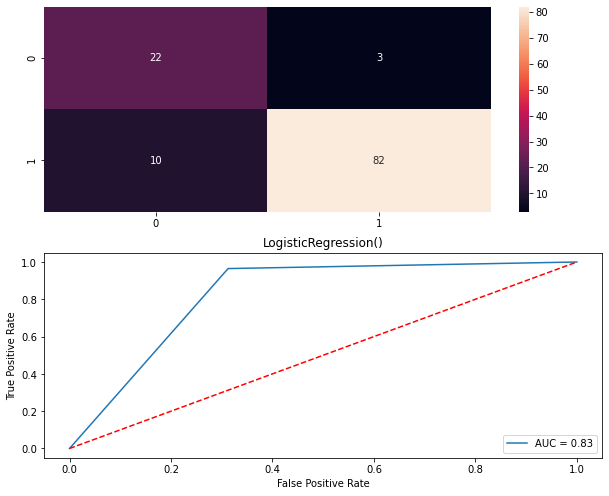

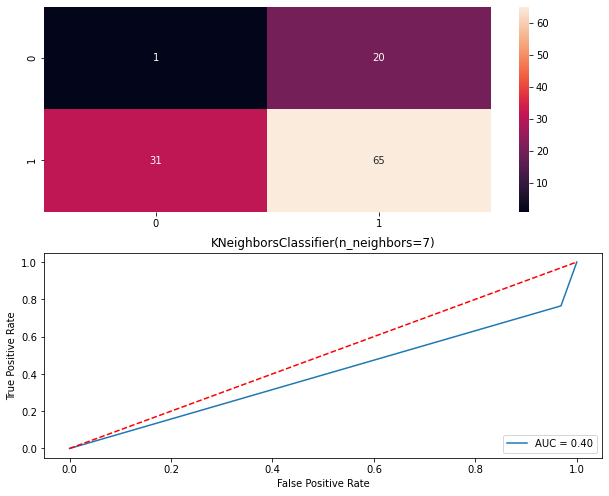

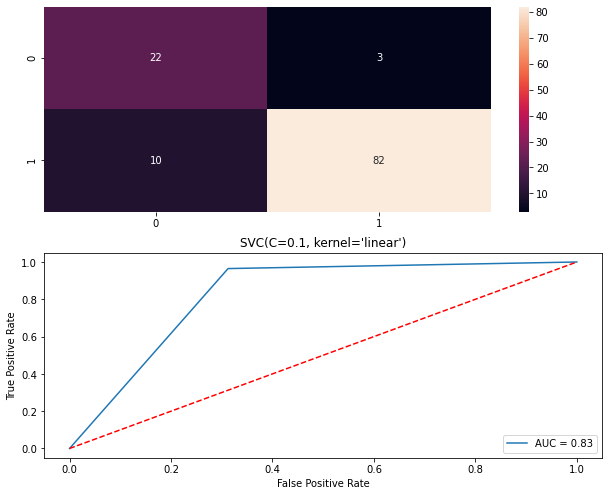

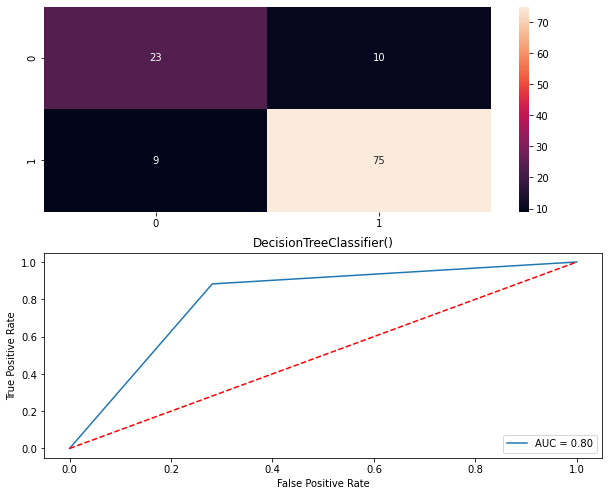

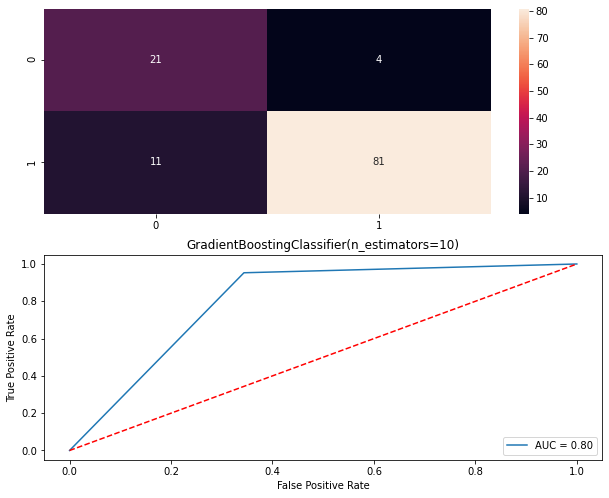

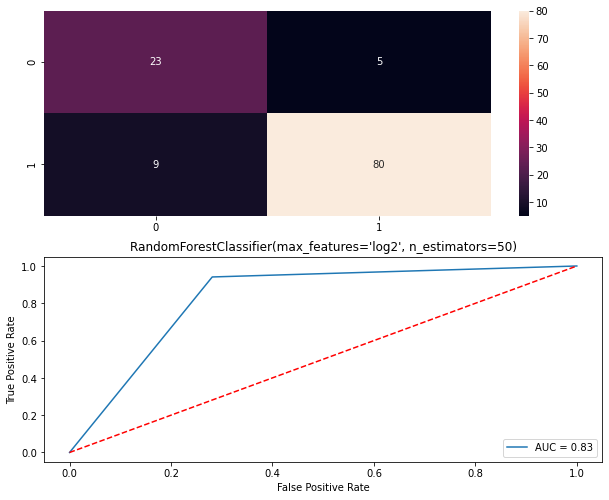

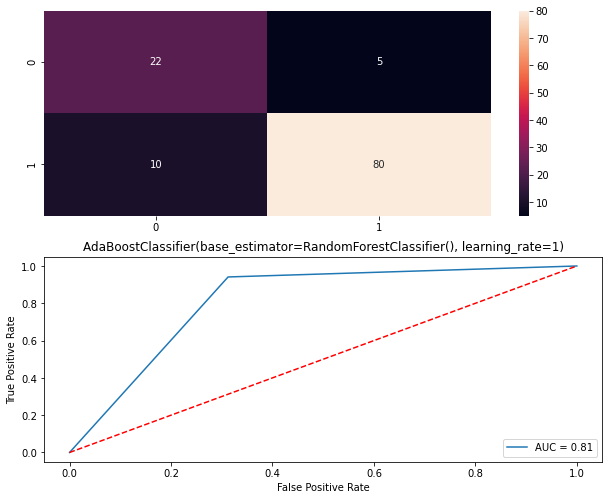

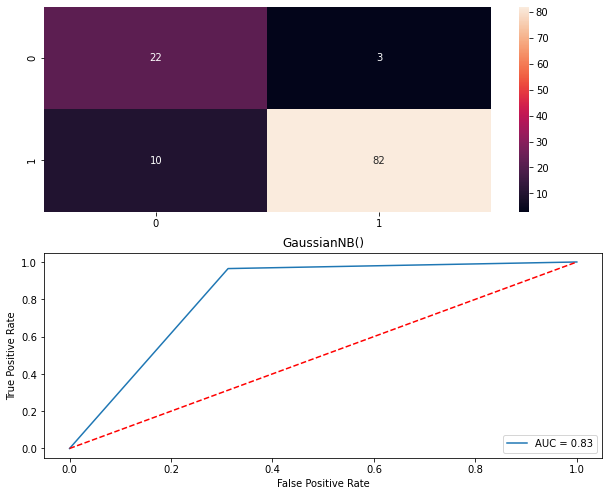

In [79]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=7),SVC(C=0.1,kernel='linear'),
          DecisionTreeClassifier(criterion='gini'),GradientBoostingClassifier(learning_rate=0.1,n_estimators=10),
          RandomForestClassifier(max_features='log2',n_estimators=50),
          AdaBoostClassifier(base_estimator= RandomForestClassifier() ,learning_rate =1, n_estimators = 50,),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    

# From below DataFrame we can see that SVC is the best Performing Model¶


In [80]:

result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.888889,0.815856,0.826103
1,KNeighborsClassifier,0.564103,0.645388,0.397978
2,SVC,0.888889,0.815856,0.826103
3,DecisionTreeClassifier,0.837607,0.717831,0.800551
4,GradientBoostingClassifier,0.871795,0.805541,0.804596
5,RandomForestClassifier,0.880342,0.764427,0.829963
6,GaussianNB,0.871795,0.784925,0.814338
7,AdaBoostClassifier,0.888889,0.814117,0.826103


In [81]:
svc=SVC(C=0.1,kernel='linear')
svc.fit(x_train,y_train)
predict=svc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8888888888888888
The CV Score = 0.8141173003241968
roc_auc_score 0.8261029411764707


# Saving the Model

In [84]:
import joblib
joblib.dump(svc,"Loan Prediction-Data.pkl")

['Loan Prediction-Data.pkl']

# Saving Prediction in csv file

In [86]:
dft=pd.DataFrame(predict)
dft.to_csv("Loan Prediction-Data.csv")